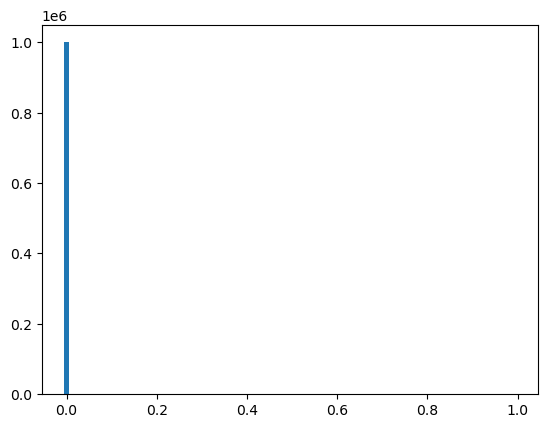

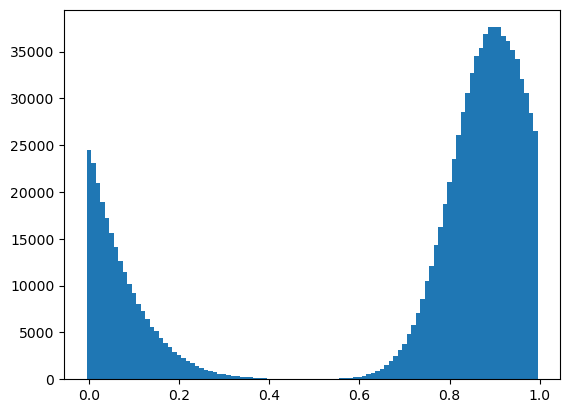

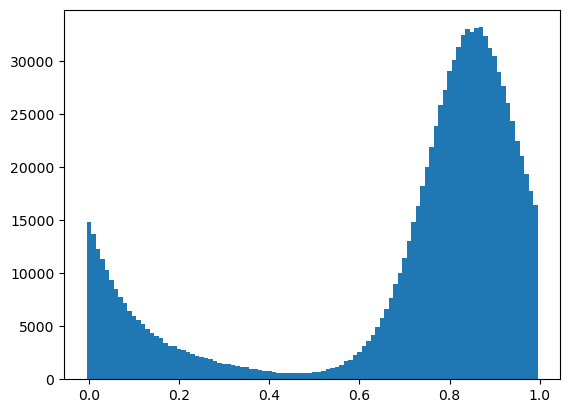

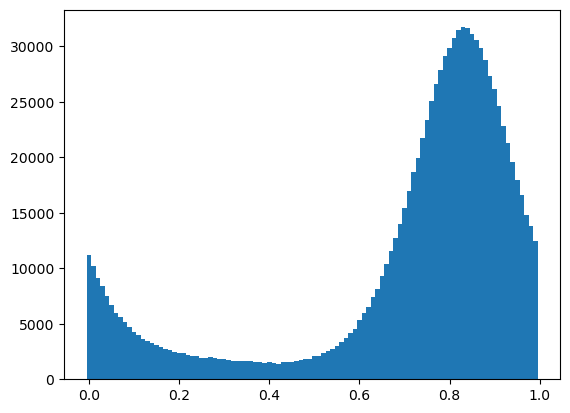

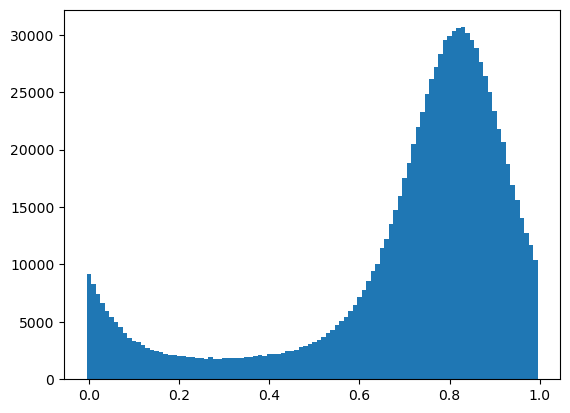

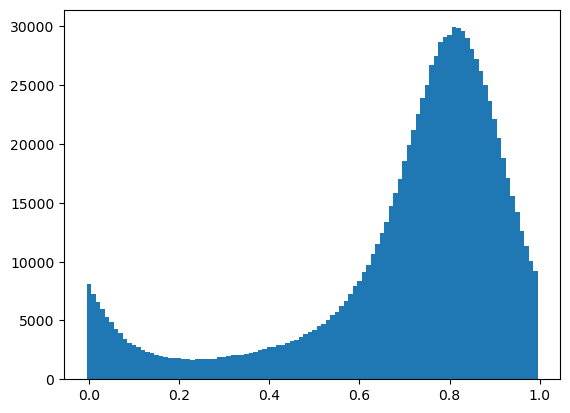

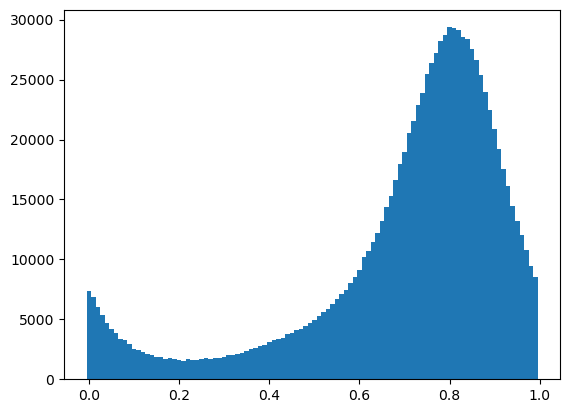

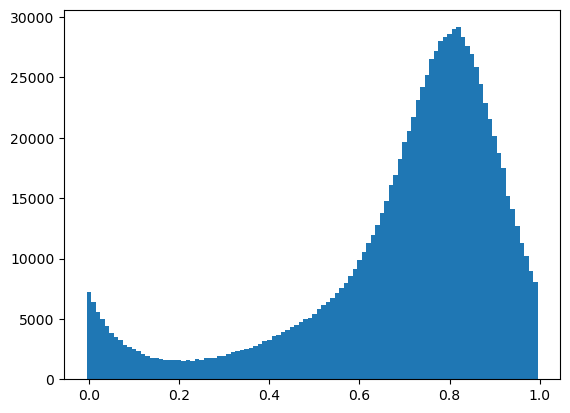

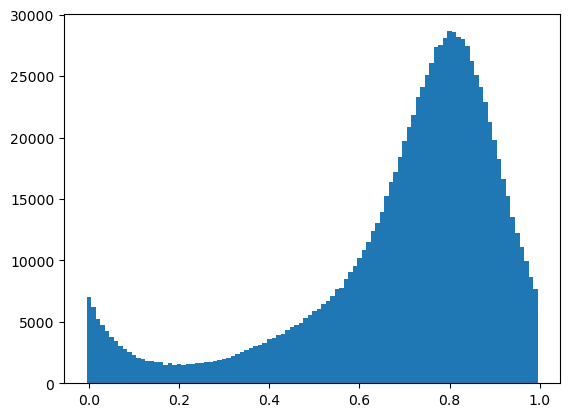

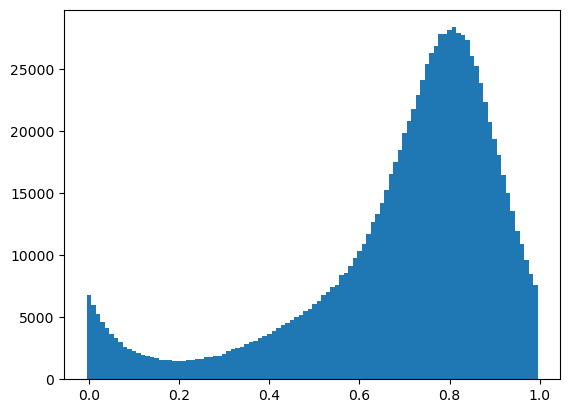

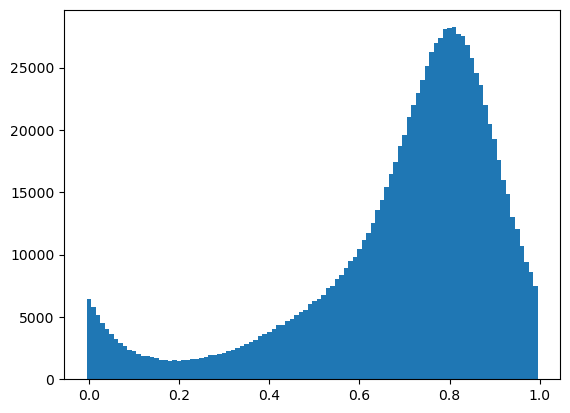

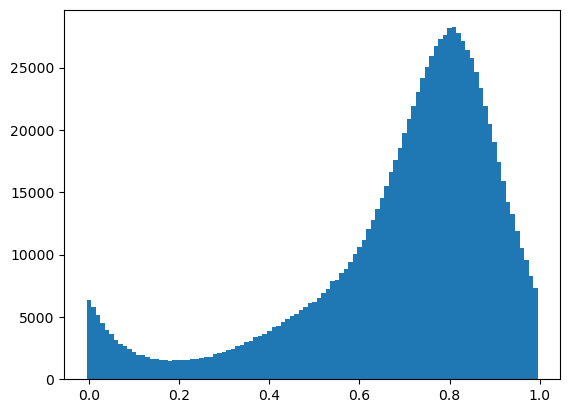

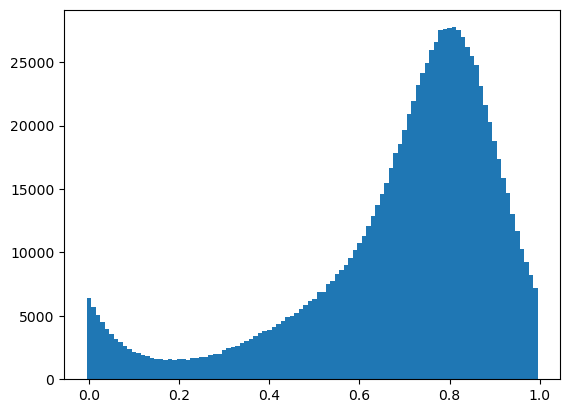

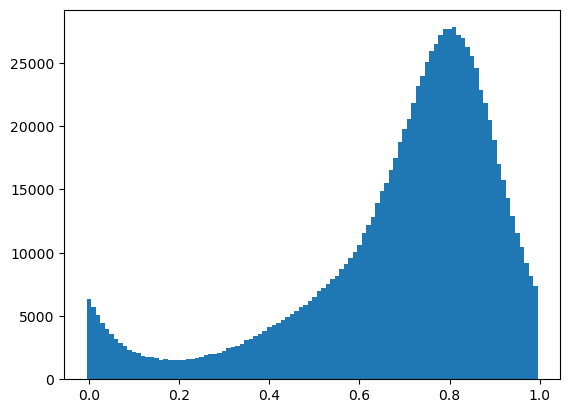

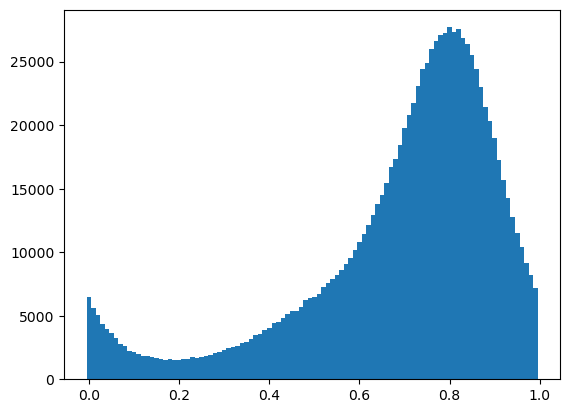

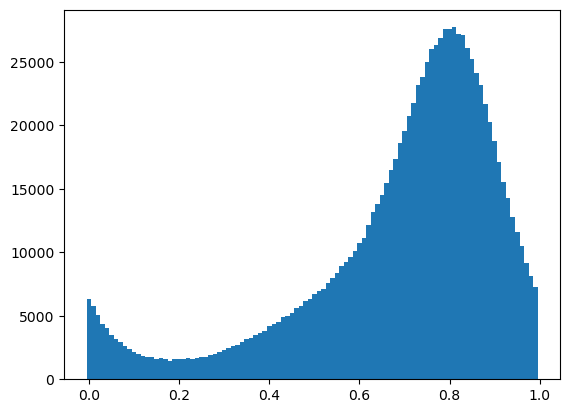

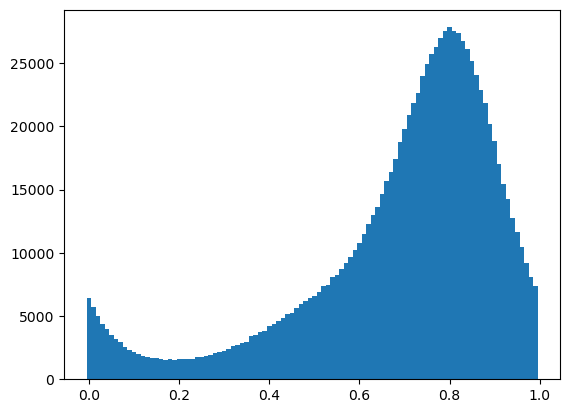

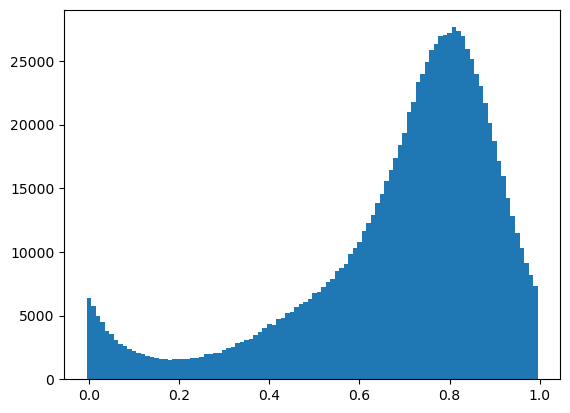

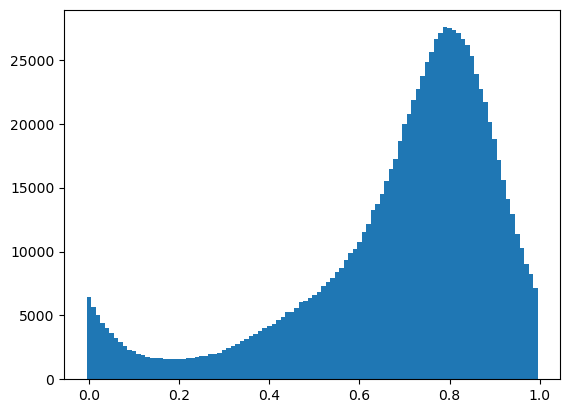

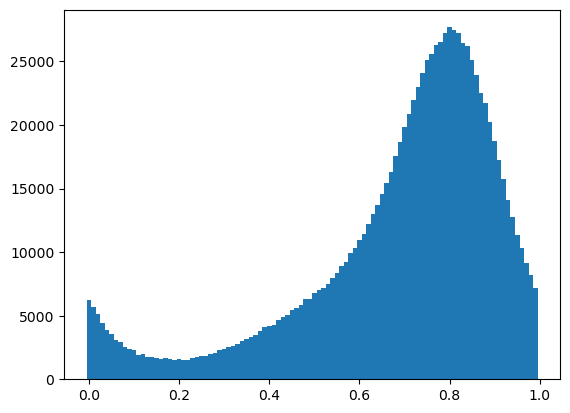

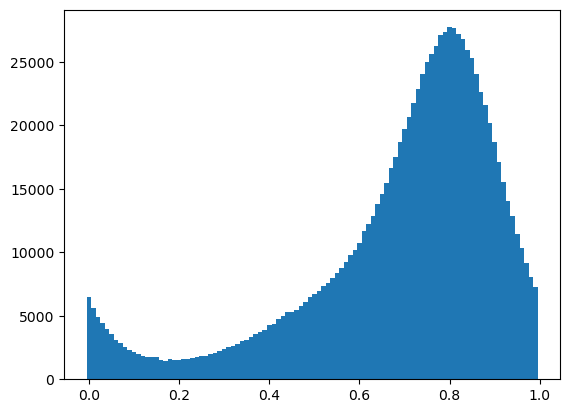

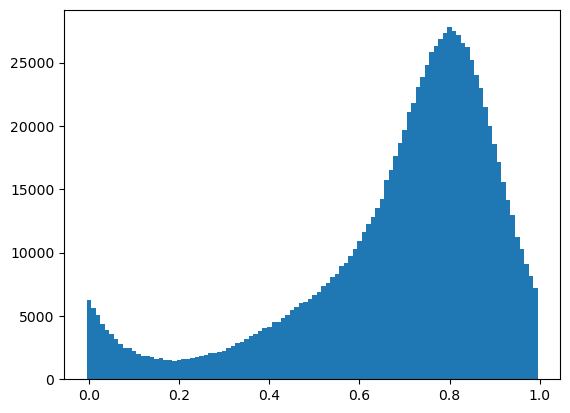

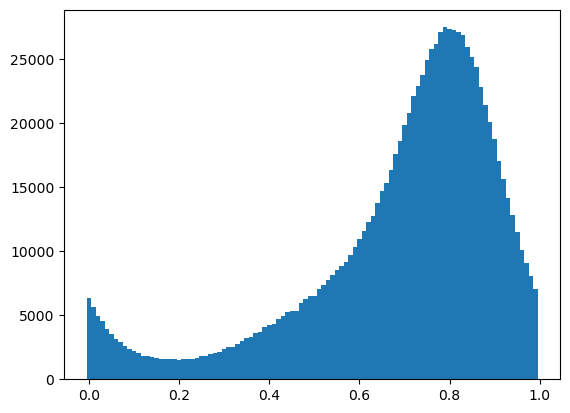

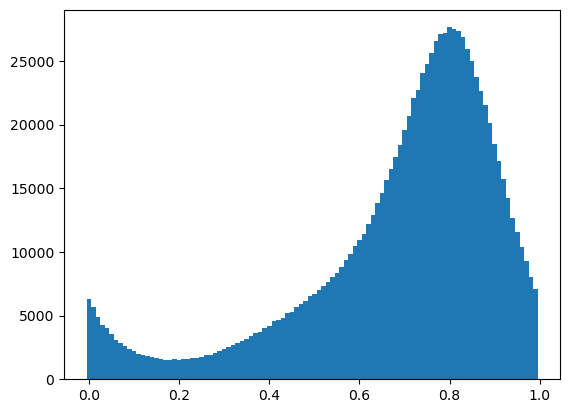

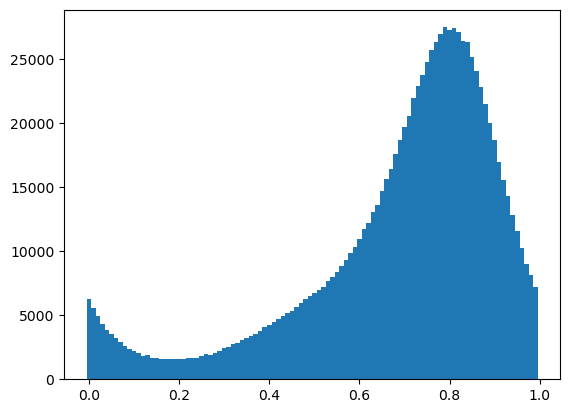

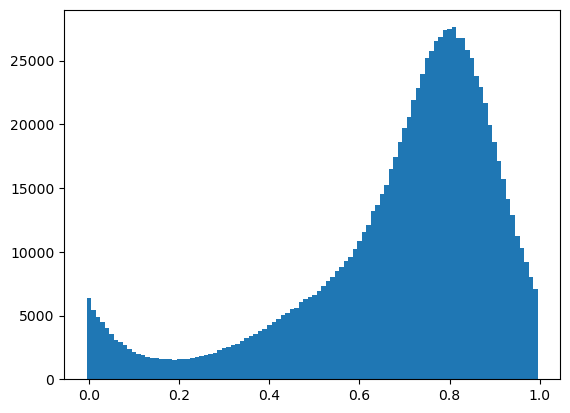

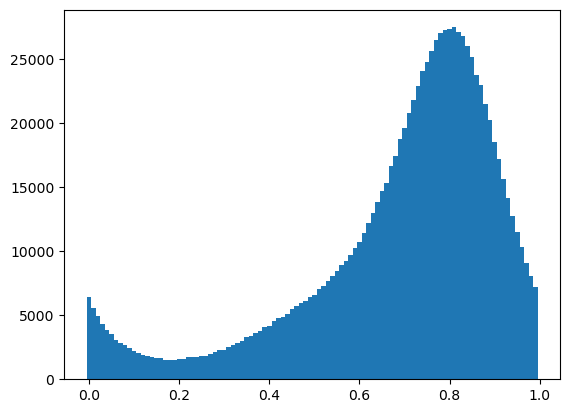

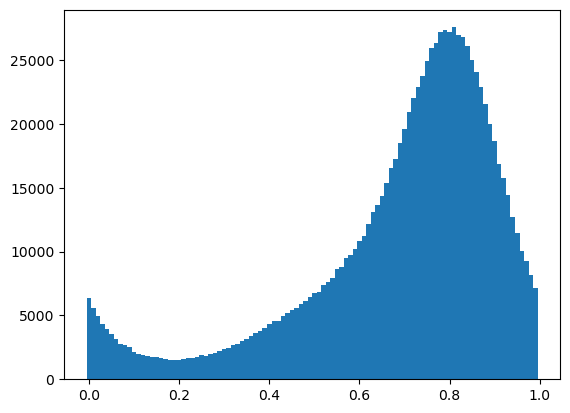

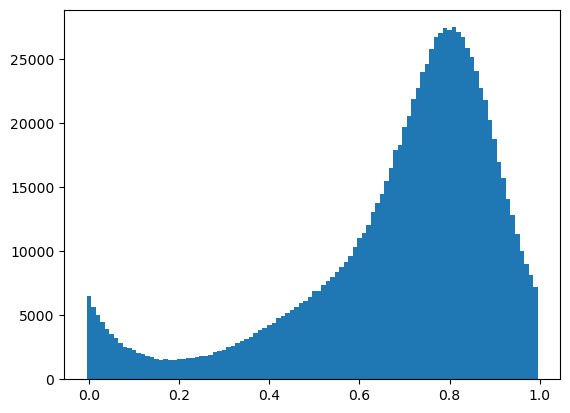

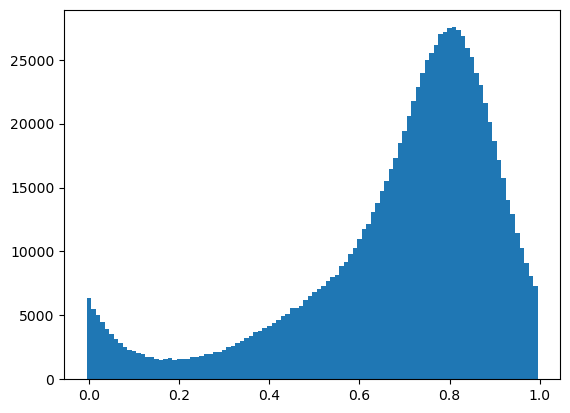

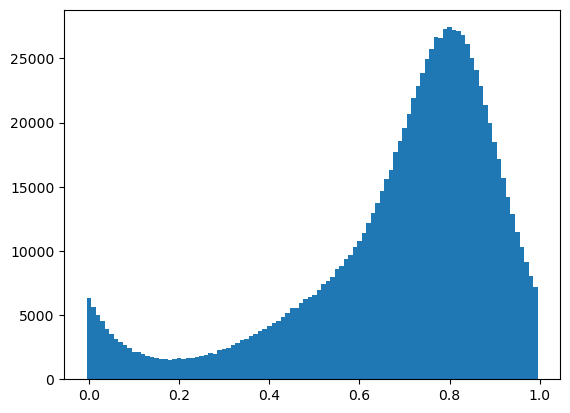

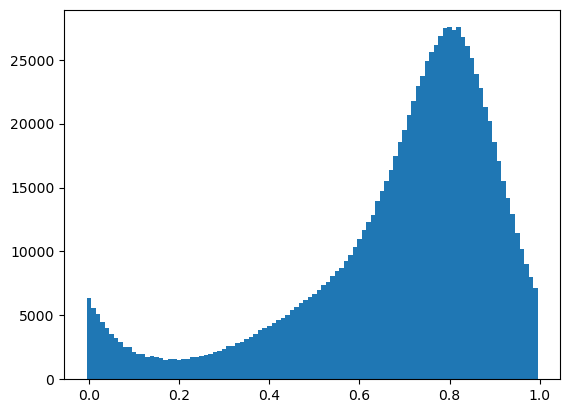

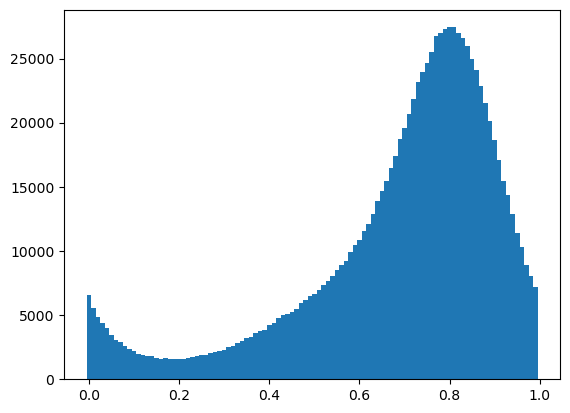

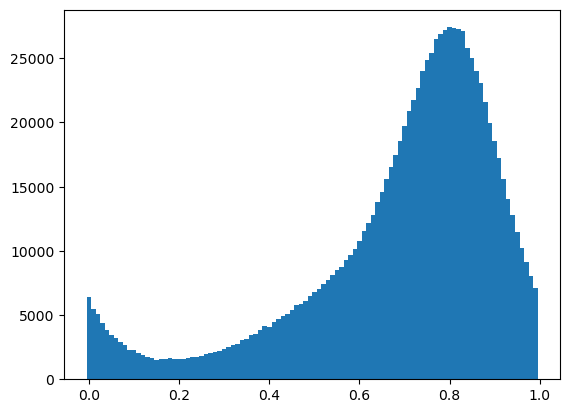

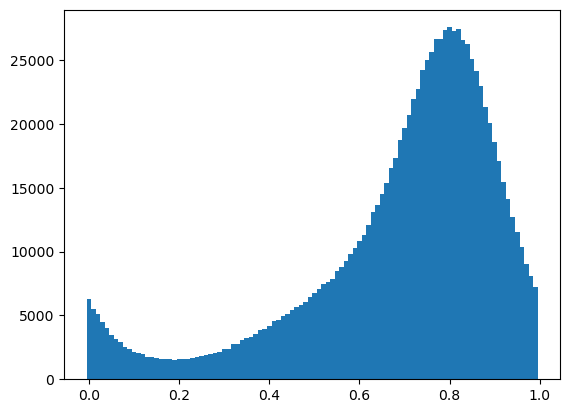

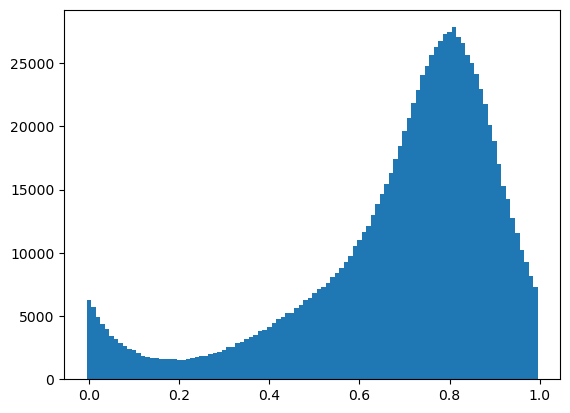

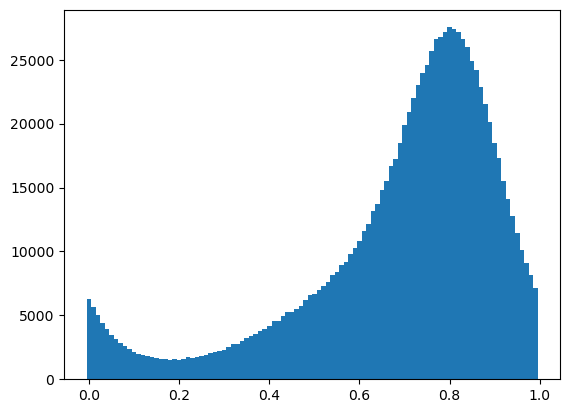

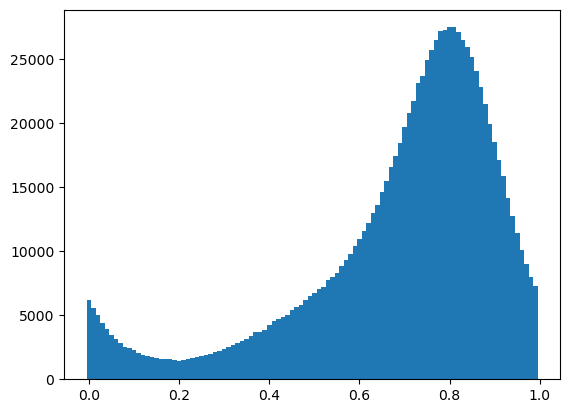

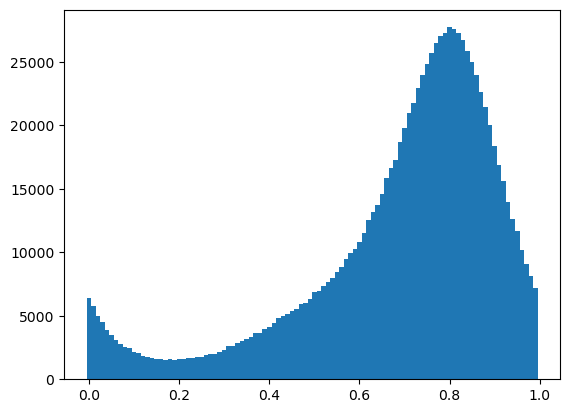

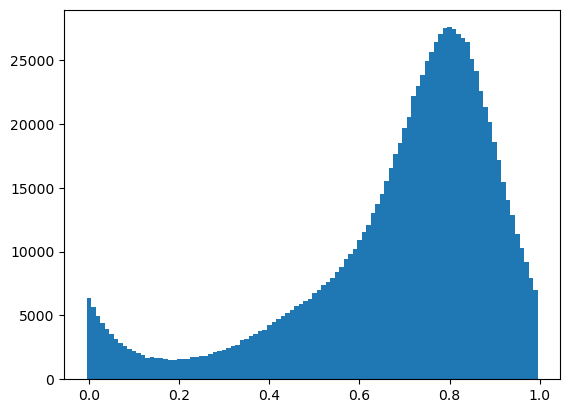

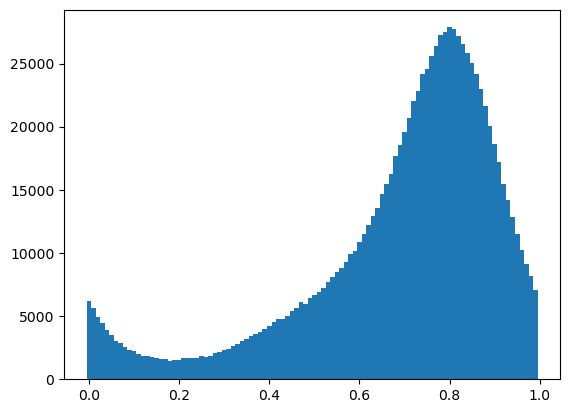

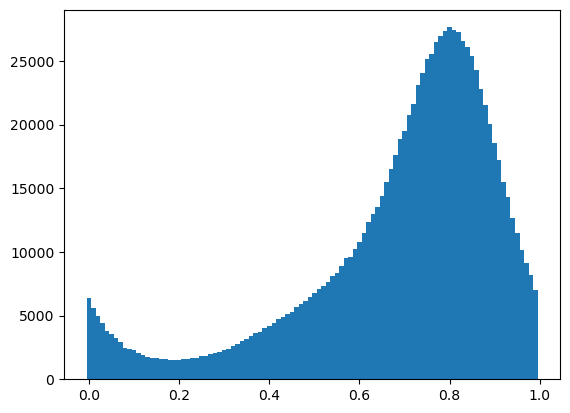

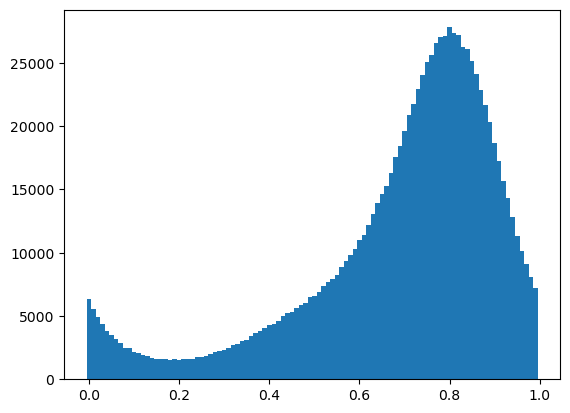

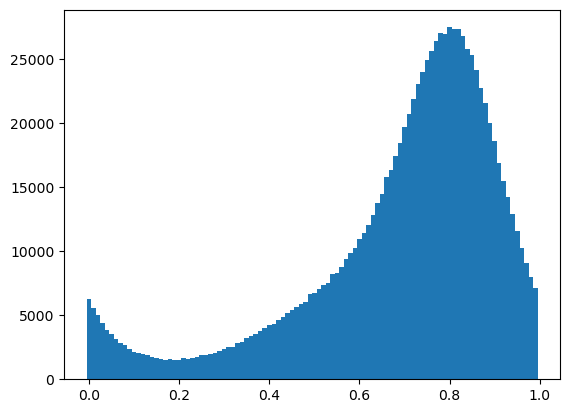

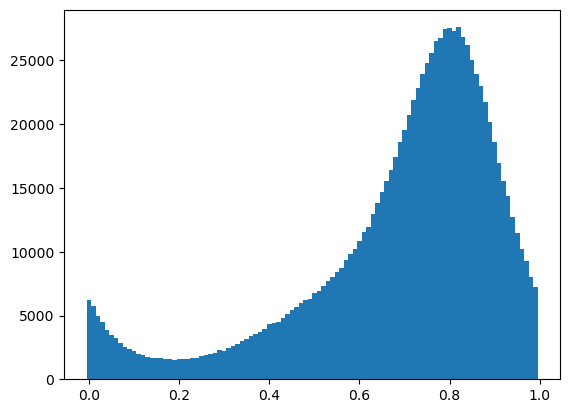

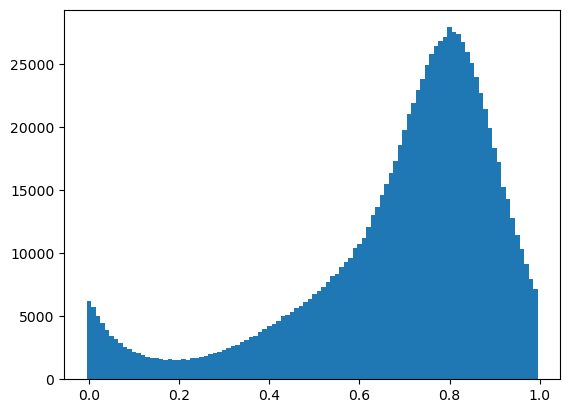

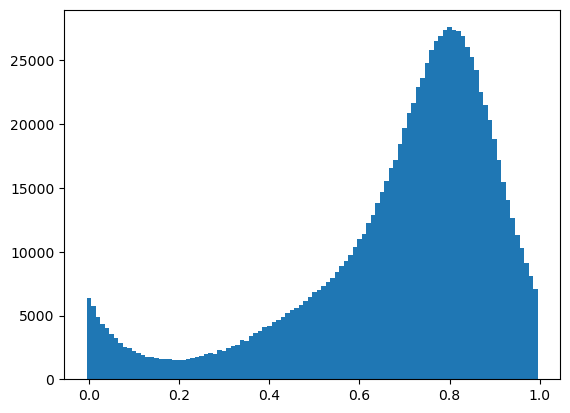

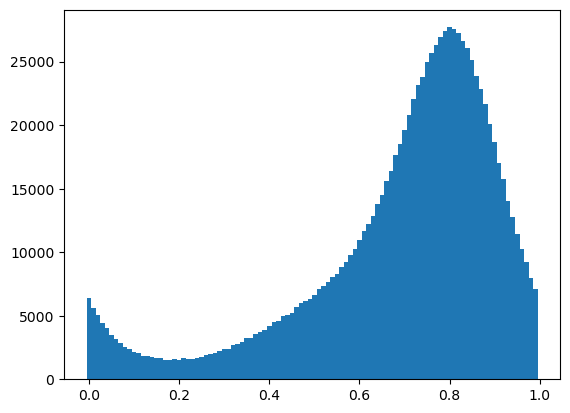

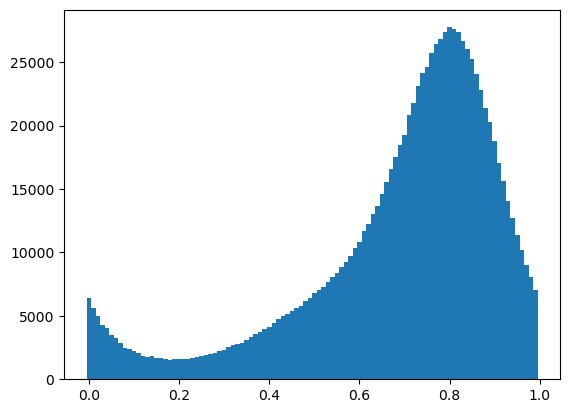

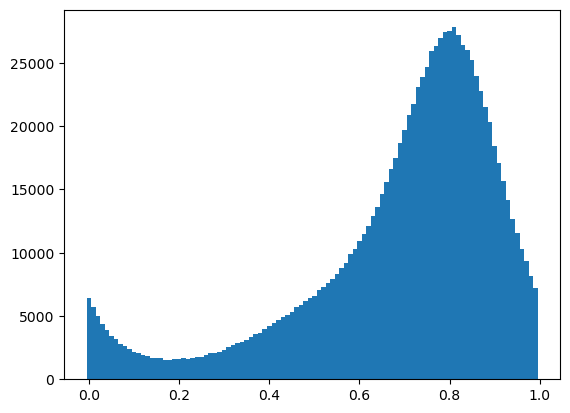

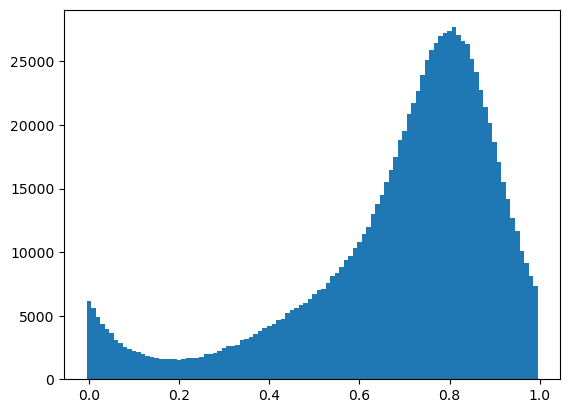

KeyboardInterrupt: 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Parameters
Dt = 0.001  # Time step
NROBINS = 100  # Number of bins
NROPARTS = 1000000  # Number of particles
SEED = 98273614  # Global seed
Temp = 0.75  # Temperature
trun = 10  # Histogram steps
num_iterations = 1000  # Total iterations

# Set the random seed
np.random.seed(SEED)


# Force function
def force(x):
    """Computes the force acting on a particle."""
    return -math.pi * (2.0 * np.cos(2.0 * math.pi * x) + np.cos(4.0 * math.pi * x))


# Dynamics function
def evolve(x, temp, trun):
    """
    Updates the position of particles using dynamics.
    :param x: Array of particle positions
    :param temp: Temperature
    :param trun: Number of time steps
    :return: Updated positions
    """
    fac = math.sqrt(2.0 * temp * Dt)
    for _ in range(trun):
        # Generate Gaussian random numbers
        rand_gauss = np.random.normal(size=len(x))
        # Update positions using dynamics
        x += force(x) * Dt + fac * rand_gauss
        # Apply periodic boundary conditions
        x[x < 0.0] += 1.0
        x[x > 1.0] -= 1.0
    return x


# Initialize particle positions
X = np.zeros(NROPARTS, dtype=np.float32)

# Initialize histogram
Histogram = np.zeros(NROBINS, dtype=np.float32)

# Save histogram data
with open("histograms.dat", "w") as histout:
    for n in range(num_iterations):
        # Compute histogram
        hist, bins = np.histogram(X, bins=NROBINS, range=(0.0, 1.0))
        Histogram = hist.astype(np.float32)

        # Write histogram to file
        hist_values = Histogram.tolist()
        histout.write(" ".join(map(str, hist_values)) + "\n")

        # Update positions
        X = evolve(X, Temp, trun)

        # Optional: Visualize histogram (uncomment for real-time visualization)
        plt.bar(bins[:-1], Histogram, width=1.0 / NROBINS)
        plt.pause(0.01)